# 라이브러리

In [3]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import random
import pingouin as pg

from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm


# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font',family=font_name)


# 데이터 불러오기

In [6]:
import pandas as pd
DATA_PATH = './dataset/CARD/'
DATA_PATH_2 = './dataset/CUSTOMER/'
DATA_PATH_3 = './dataset/CC/'

df = pd.read_csv(DATA_PATH_3 + 'cc_23_40_r.csv', encoding="utf-8-sig")

In [7]:
df.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9997288918,202312,기타,서울특별시,중구,5번이하,9483
1,9997288918,202312,대형마트,경상북도,경산시,5번이하,31139
2,9997288918,202312,음식료품,경상남도,김해시,5번이하,31013
3,9997288918,202312,편의점,경상북도,김천시,5번이하,32098
4,9997288918,202312,외식,경상북도,김천시,5번이하,20945


In [8]:
df['거래년월'] = pd.to_datetime(df['거래년월'], format='%Y%m').dt.to_period('M')
df.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9997288918,2023-12,기타,서울특별시,중구,5번이하,9483
1,9997288918,2023-12,대형마트,경상북도,경산시,5번이하,31139
2,9997288918,2023-12,음식료품,경상남도,김해시,5번이하,31013
3,9997288918,2023-12,편의점,경상북도,김천시,5번이하,32098
4,9997288918,2023-12,외식,경상북도,김천시,5번이하,20945


In [9]:
monthly_sum = df.groupby('거래년월')['승인금액'].sum()
monthly_sum.head()

거래년월
2023-01    66236672028
2023-02    61837541399
2023-03    67998668853
2023-04    67112173183
2023-05    69490532648
Freq: M, Name: 승인금액, dtype: int64

In [10]:
monthly_sum

거래년월
2023-01    66236672028
2023-02    61837541399
2023-03    67998668853
2023-04    67112173183
2023-05    69490532648
2023-06    66797419922
2023-07    69165468200
2023-08    66950693802
2023-09    66051984595
2023-10    68260979082
2023-11    66640170650
2023-12    69293437552
Freq: M, Name: 승인금액, dtype: int64

In [20]:
monthly_sum.dtypes

dtype('int64')

In [22]:
# 딕셔너리를 데이터프레임으로 변환
df = pd.DataFrame(monthly_sum)

In [26]:
df.head()

,승인금액
거래년월,
2023-01-01,66236672028
2023-02-01,61837541399
2023-03-01,67998668853
2023-04-01,67112173183
2023-05-01,69490532648


In [28]:
df.describe()

,승인금액
count,1.200000e+01
mean,6.715298e+10
std,2.062134e+09
min,6.183754e+10
25%,6.653930e+10
50%,6.703143e+10
75%,6.848710e+10
max,6.949053e+10


# 시계열데이터시각화

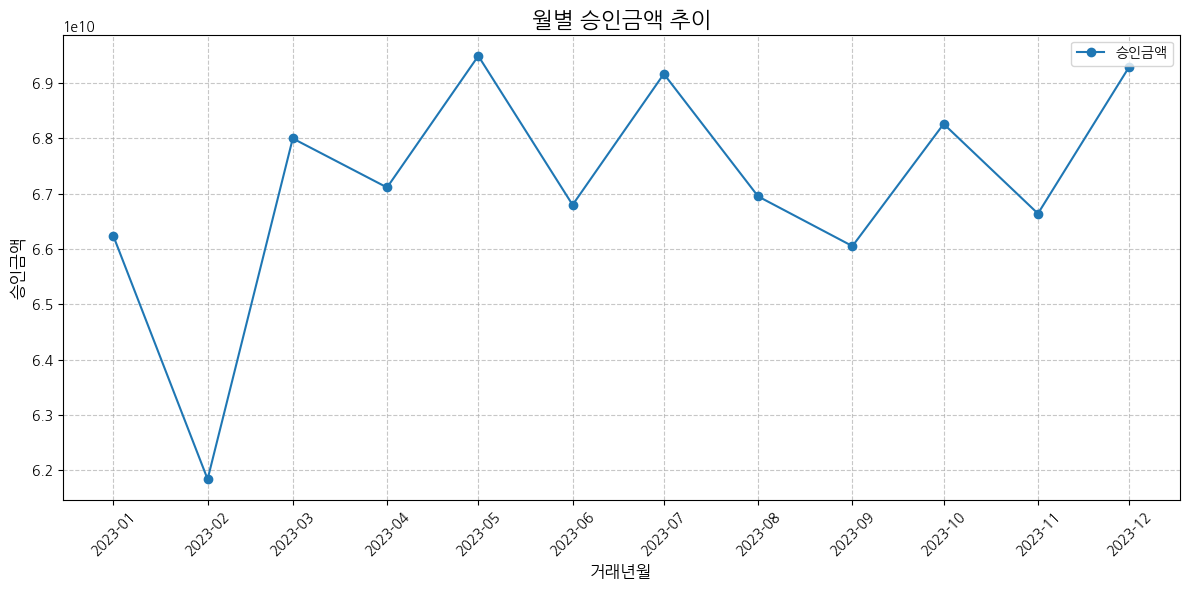

In [29]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 라인 차트 그리기
plt.plot(df.index, df['승인금액'], marker='o', label='승인금액')

# X축 라벨 형식 및 회전
plt.xticks(df.index, df.index.strftime('%Y-%m'), rotation=45)

# 제목 및 축 라벨 추가
plt.title('월별 승인금액 추이', fontsize=16)
plt.xlabel('거래년월', fontsize=12)
plt.ylabel('승인금액', fontsize=12)

# 격자 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 범례 추가
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


# 정상성

In [30]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df['승인금액'])
print(f'통계량: {ADF_result[0]}, p-value: {ADF_result[1]}')

통계량: -3.165307732145505, p-value: 0.02208269267076698


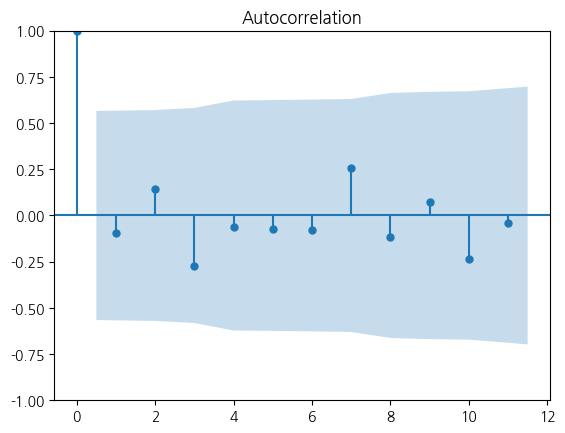

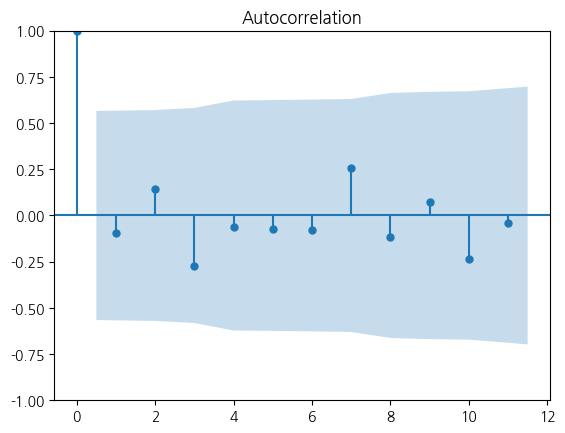

In [31]:
from statsmodels.graphics.tsaplots import plot_acf

# AutoCorrelation Function
# 자기상관 : 특정 시점의 값이 이전 시점(이후 시점)의 값과 상관관계를 가지는 현상
plot_acf(df['승인금액'], lags = 11)

통계량: -3.165307732145505, p-value: 0.02208269267076698
p-value가 0.05보다 작으므로, 정상성을 만족합니다. 차분이 필요하지 않습니다.


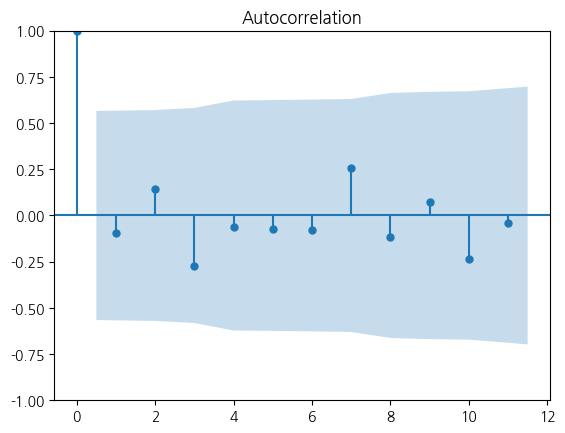

In [33]:
def check_ADF_draw_ACF_ver2(data):
    from statsmodels.tsa.stattools import adfuller

    ADF_result = adfuller(data)
    print(f'통계량: {ADF_result[0]}, p-value: {ADF_result[1]}')
    # p-value 확인 및 메시지 출력
    if ADF_result[1] < 0.05:
        print("p-value가 0.05보다 작으므로, 정상성을 만족합니다. 차분이 필요하지 않습니다.")
        plot_acf(data, lags=11)
    else:
        print("p-value가 0.05보다 크므로, 정상성을 만족하지 않습니다. 차분을 하겠습니다.")
        diff=np.diff(data, n=1)
        plot_acf(diff, lags=11)

    return None

check_ADF_draw_ACF_ver2(df['승인금액'])

# MA 모형

In [34]:
df_diff = pd.DataFrame({'승인금액' : df['승인금액']})
df_diff.head(1)

,승인금액
거래년월,
2023-01-01,66236672028


In [35]:
# 훈련 데이터 및 테스트 데이터 분리
train = df_diff[:int(0.9*len(df_diff))]
test = df_diff[int(0.9*len(df_diff)):]

print(len(train))
print(len(test))

10
2
